In [267]:
import numpy as np
import pandas as pd
import matplotlib as mt
import seaborn as sns
import matplotlib.pyplot as plt

In [268]:
df = pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


## Understanding the dataset

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [270]:
df.shape

(200, 5)

## EDA

In [271]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [272]:
## There are no null values or missing data in the dataset

In [273]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [274]:
for i in df.columns:
    if df[i].dtypes == 'object':
        print(i)
        print()
        print('the values are:') 
        print(df[i].value_counts())
        print()
        print()

Genre

the values are:
Female    112
Male       88
Name: Genre, dtype: int64




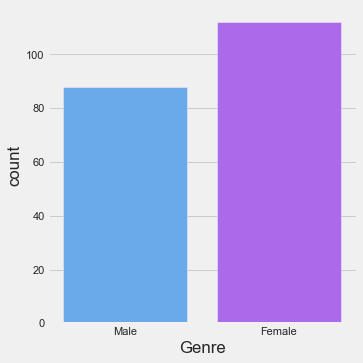

In [275]:
sns.catplot(x="Genre", kind="count", palette="cool", data=df)
## Visualizing data
## The number of Females are more than 100 and number of males are 85

In [276]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


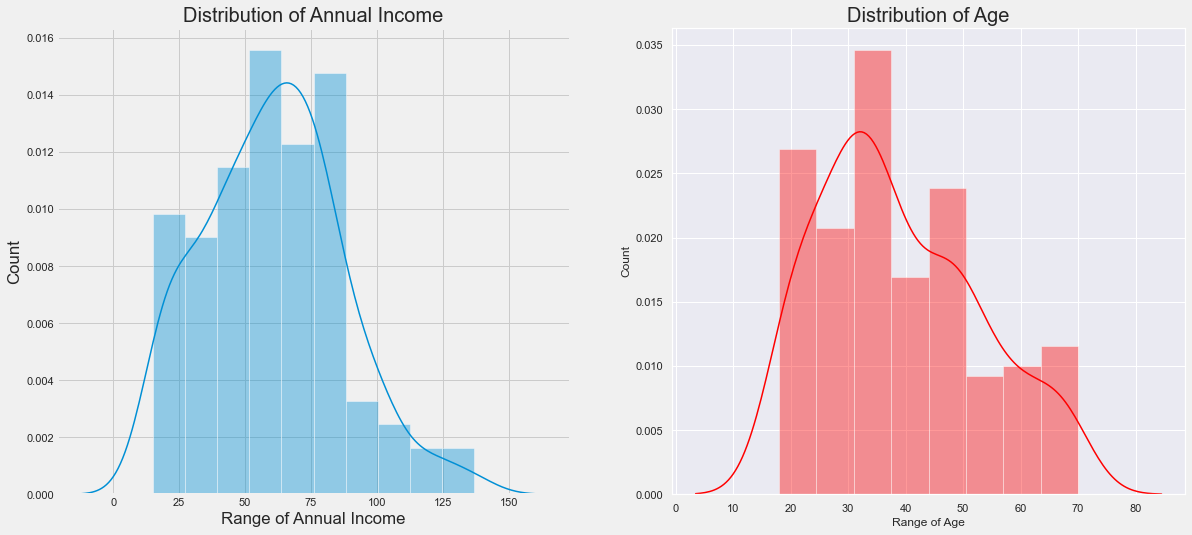

In [277]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set()
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set()
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

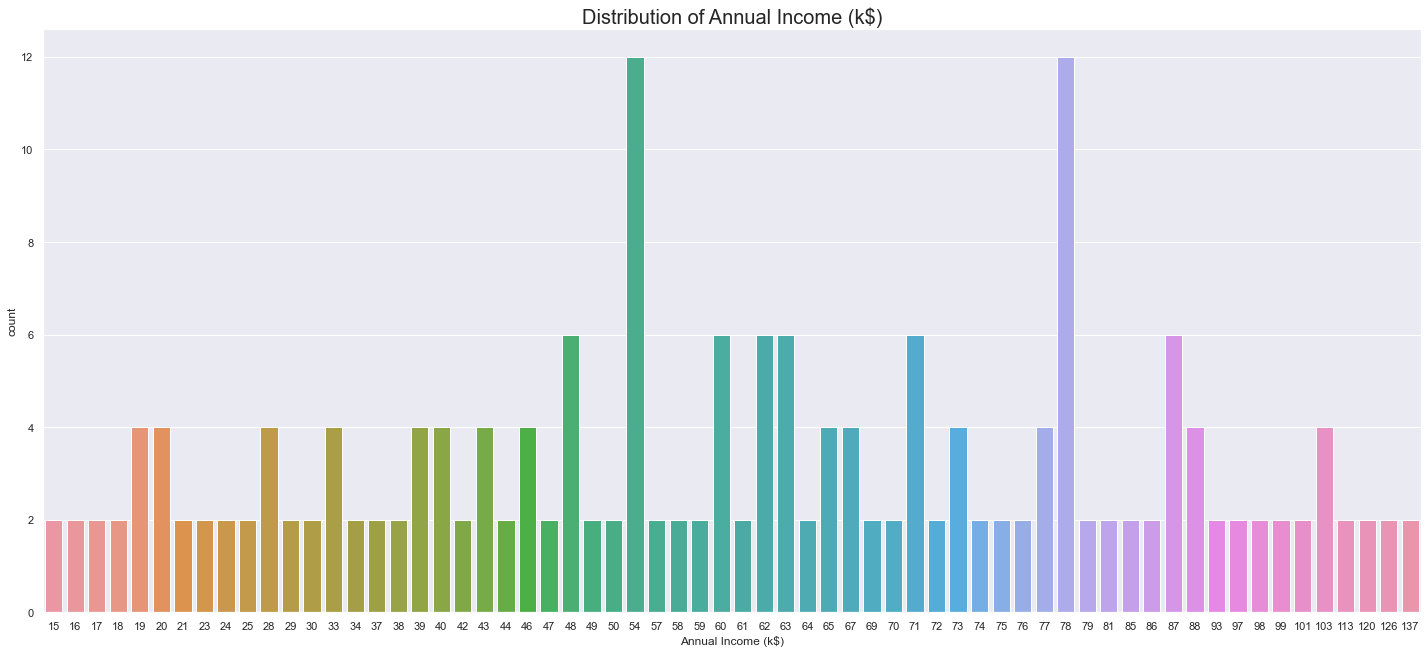

In [278]:
plt.figure(figsize=(22,10))
sns.countplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income (k$)', fontsize = 20)
plt.show()

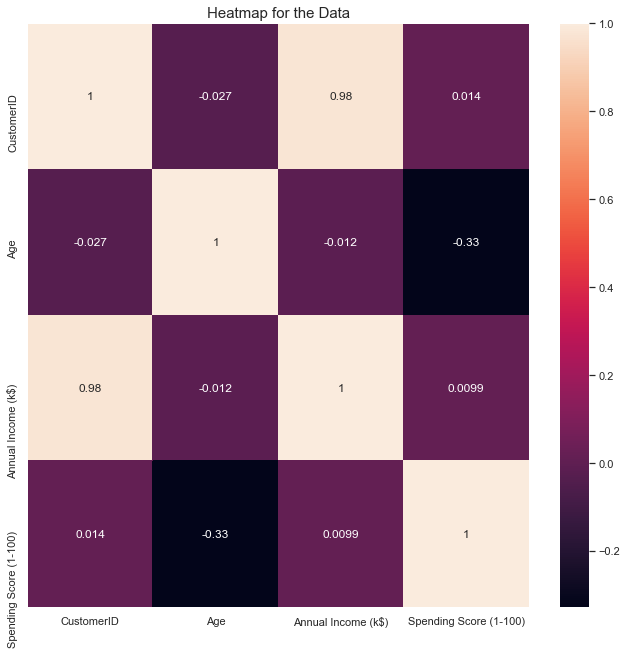

In [280]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)
plt.title('Heatmap for the Data', fontsize = 15)
plt.show()

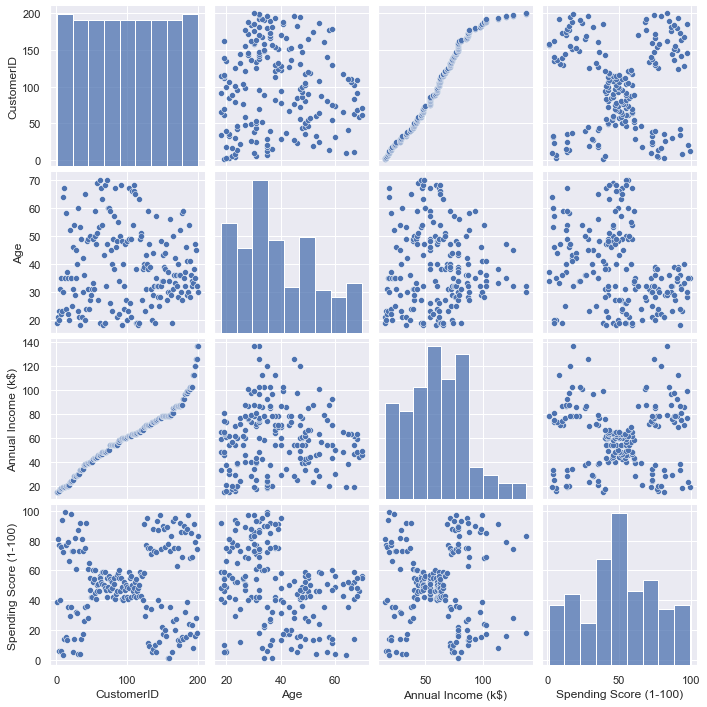

In [282]:
sns.pairplot(df)

### From the pair plots it is clear that the the best clusters can be achived by taking into consideration Annual Income and Spending Score and also with might be clusters of segments based on their ages.

# Model Fitting and selection

## K Means Clustering

In [283]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [284]:
df1 = df.copy()

In [285]:
df1 = pd.get_dummies(df1,drop_first=True)

In [286]:
df1

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
...,...,...,...,...,...
195,196,35,120,79,0
196,197,45,126,28,0
197,198,32,126,74,1
198,199,32,137,18,1


### Using Standard Scaler to fit transform

In [287]:
scaler = StandardScaler()
features = scaler.fit_transform(df1)

In [288]:
features

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148,  1.12815215],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407,  1.12815215],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298, -0.88640526],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783, -0.88640526],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992, -0.88640526],
       [-1.63680847, -1.20926872, -1.66266033,  1.00159627, -0.88640526],
       [-1.61948775, -0.27630176, -1.62449091, -1.71591298, -0.88640526],
       [-1.60216702, -1.13750203, -1.62449091,  1.70038436, -0.88640526],
       [-1.5848463 ,  1.80493225, -1.58632148, -1.83237767,  1.12815215],
       [-1.56752558, -0.6351352 , -1.58632148,  0.84631002, -0.88640526],
       [-1.55020485,  2.02023231, -1.58632148, -1.4053405 ,  1.12815215],
       [-1.53288413, -0.27630176, -1.58632148,  1.89449216, -0.88640526],
       [-1.5155634 ,  1.37433211, -1.54815205, -1.36651894, -0.88640526],
       [-1.49824268, -1.06573534, -1.5

### K Means with 2 clusters

In [289]:
k = 2
cluster = KMeans(n_clusters=k, random_state=10, n_jobs = -1 )
model = cluster.fit(features)

In [290]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [291]:
model.cluster_centers_

array([[ 0.89639308, -0.26723649,  0.8344239 ,  0.0102162 ,  0.04665291],
       [-0.81102231,  0.24178539, -0.75495496, -0.00924323, -0.04220977]])

## Finding the optimal K value for fitting the data

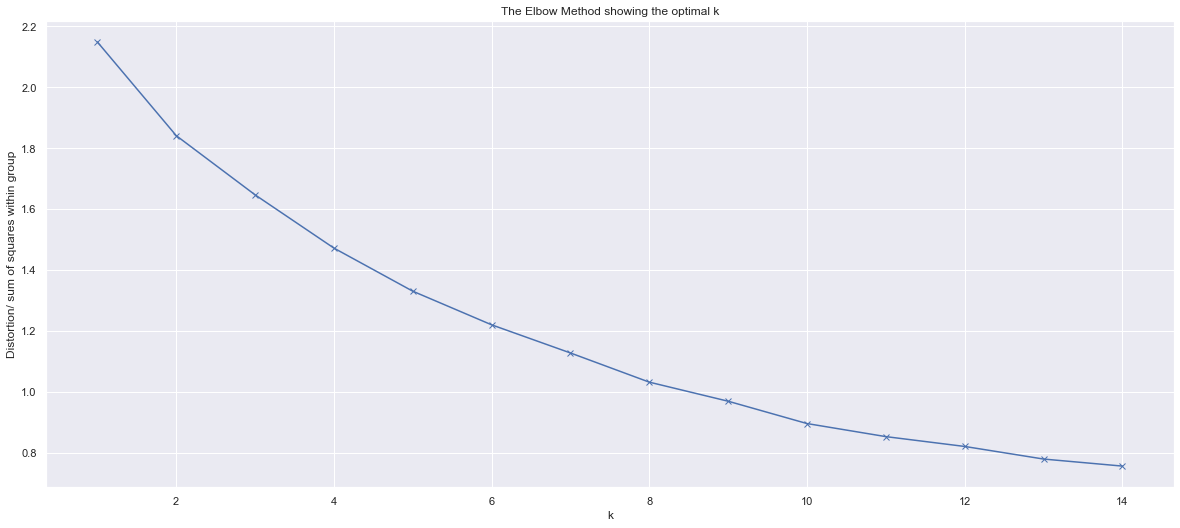

In [292]:
from scipy.spatial.distance import cdist
distortions = []
k = range(1,15)
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(features)
    distortions.append(sum(np.min(cdist(features, model.cluster_centers_, 'euclidean'), axis=1)) / features.shape[0])

# Plot the elbow
plt.plot(k, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion/ sum of squares within group')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [293]:
cluster = KMeans(n_clusters=2, random_state=10, n_jobs=-1)
model = cluster.fit(features)

In [294]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [295]:
model.cluster_centers_

array([[ 0.89639308, -0.26723649,  0.8344239 ,  0.0102162 ,  0.04665291],
       [-0.81102231,  0.24178539, -0.75495496, -0.00924323, -0.04220977]])

In [296]:
model.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [297]:
labels = model.labels_
centroids = model.cluster_centers_
#centroids

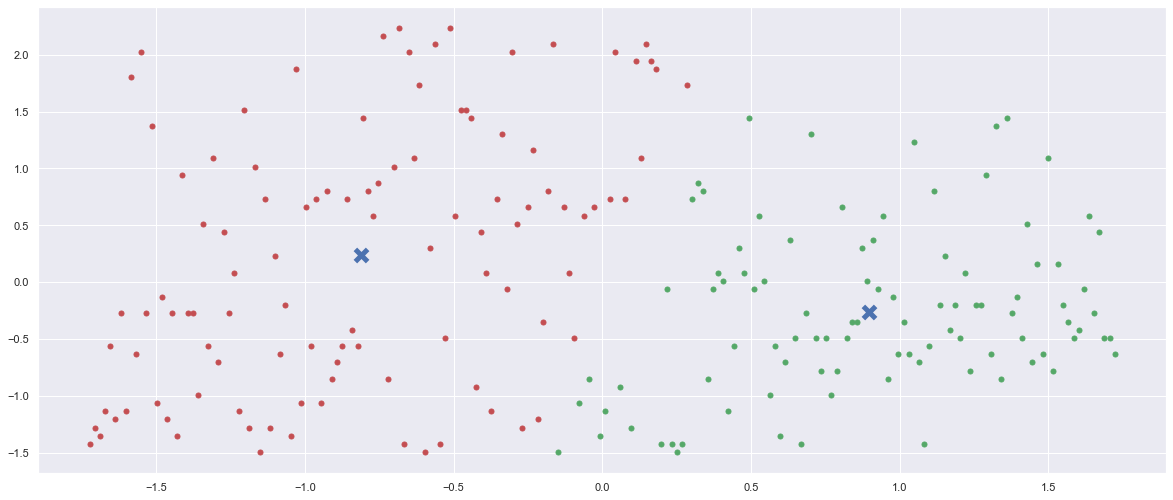

In [298]:
colors = ["g.","r.","y.", "c.", "b."]
x_axis = 0
y_axis = 1
for i in range(features.shape[0]):
    #print("coordinate:",features[i], "label:", labels[i])
    plt.plot(features[i][x_axis], features[i][y_axis], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, x_axis],centroids[:, y_axis], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()
	

### K Means with 2 clusters

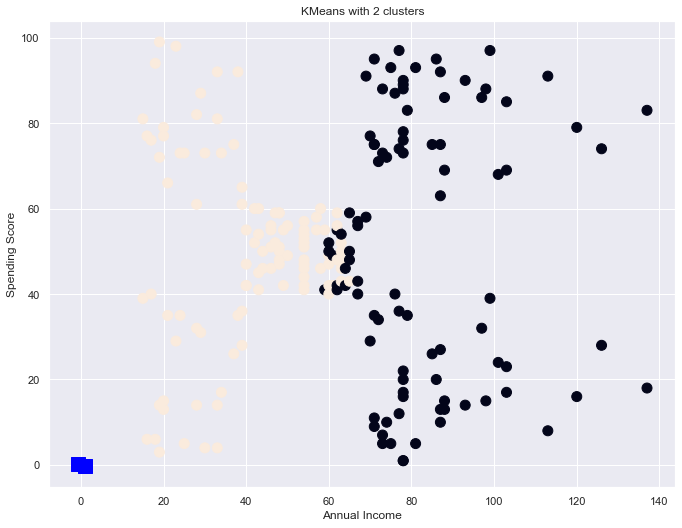

In [299]:
plt.figure(figsize=(10, 8))

plt.scatter(df['Annual Income (k$)'], 
            df['Spending Score (1-100)'], 
            c=model.labels_, s=100)

plt.scatter(centroids[:,0], centroids[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('KMeans with 2 clusters')

plt.show()

In [300]:
from sklearn.metrics import silhouette_score
score = silhouette_score (df1, model.labels_)
print("Score = ", score)

Score =  0.4658160687519246


### Now with K = 5

In [301]:
cluster = KMeans(n_clusters=5, random_state=10, n_jobs=-1)
model = cluster.fit(features)

In [302]:
model.labels_

array([4, 4, 4, 4, 4, 4, 1, 4, 2, 4, 2, 4, 1, 4, 2, 4, 4, 4, 2, 4, 4, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 2, 4, 2, 4, 1, 4, 1, 4, 1, 4, 1, 4, 2, 4,
       1, 4, 1, 4, 4, 4, 1, 4, 4, 2, 1, 2, 1, 2, 4, 2, 2, 4, 1, 1, 2, 4,
       1, 1, 4, 4, 2, 1, 1, 1, 2, 4, 1, 2, 4, 1, 2, 2, 2, 1, 4, 2, 1, 4,
       1, 1, 1, 4, 2, 1, 1, 4, 1, 4, 2, 4, 4, 1, 2, 4, 2, 4, 1, 2, 2, 2,
       2, 4, 1, 4, 4, 4, 1, 1, 1, 1, 3, 1, 1, 3, 0, 3, 0, 3, 2, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3])

In [303]:
model.cluster_centers_

array([[ 1.08067278,  0.07477313,  1.02570541, -1.21752808,  0.14809719],
       [-0.4999775 ,  0.76168963, -0.44961726, -0.33159294, -0.88640526],
       [-0.52350397,  1.28276771, -0.47677566, -0.40668932,  1.12815215],
       [ 1.04747082, -0.45213014,  0.97293875,  1.21414431,  0.07050951],
       [-0.87175534, -1.00209318, -0.84165752,  0.41268052, -0.0881844 ]])

In [304]:
labels = model.labels_
centroids = model.cluster_centers_
#centroids

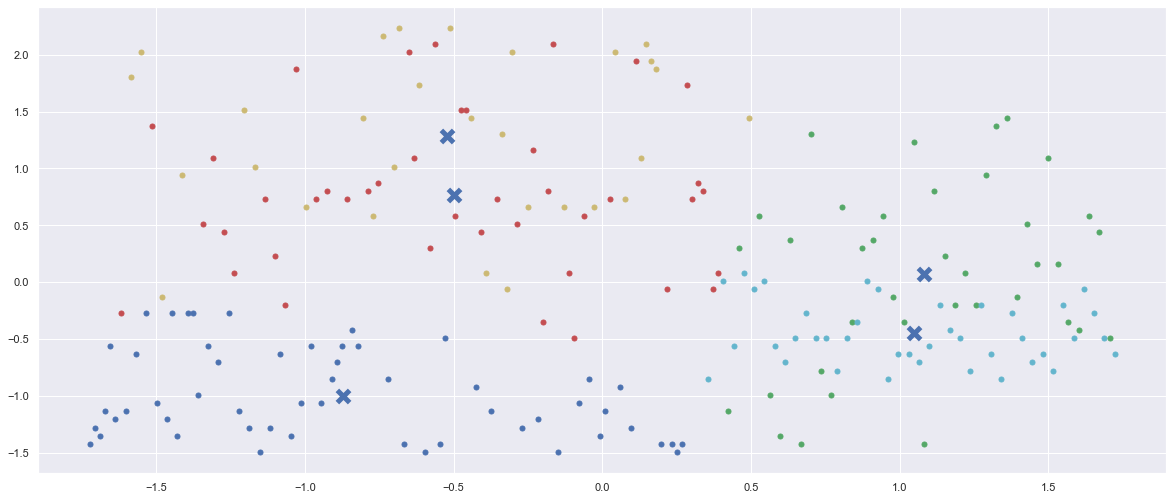

In [305]:
colors = ["g.","r.","y.", "c.", "b."]
x_axis = 0
y_axis = 1
for i in range(features.shape[0]):
    #print("coordinate:",features[i], "label:", labels[i])
    plt.plot(features[i][x_axis], features[i][y_axis], colors[labels[i]], markersize = 10)


plt.scatter(centroids[:, x_axis],centroids[:, y_axis], marker = "x", s=150, linewidths = 5, zorder = 10)

plt.show()
	

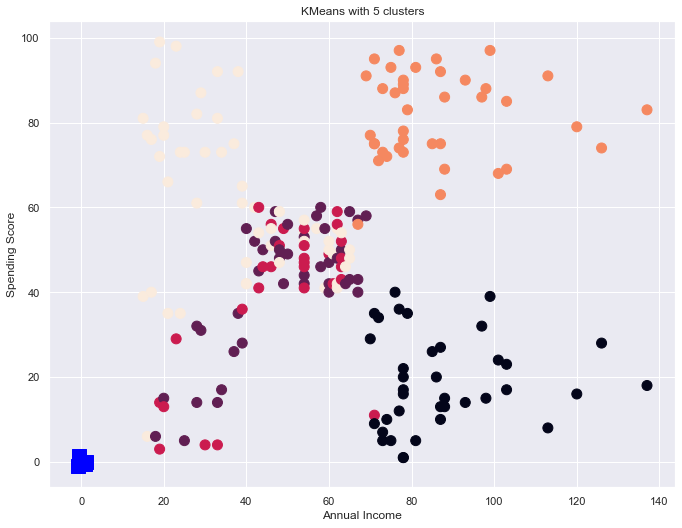

In [306]:
plt.figure(figsize=(10, 8))

plt.scatter(df['Annual Income (k$)'], 
            df['Spending Score (1-100)'], 
            c=model.labels_, s=100)

plt.scatter(centroids[:,0], centroids[:,1], color='blue', marker='s', s=200) 

plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('KMeans with 5 clusters')

plt.show()

In [307]:
from sklearn.metrics import silhouette_score
score = silhouette_score (df1, model.labels_)
print("Score = ", score)

Score =  0.2114493609692701


### Using K Means - Transformation we are getting the Score =  0.4658160687519246 which is when k clusters = 2

# Without Transformation let's try to find the optimal number of K for N Clusters required 

In [308]:
#df = pd.get_dummies(df,drop_first=True)

In [309]:
df = pd.read_csv("Mall_Customers.csv")
df.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


### Selection of Data

In [310]:
X = df.iloc[:, [3, 4]].values

### Finding the optimal value of K using Elbow method

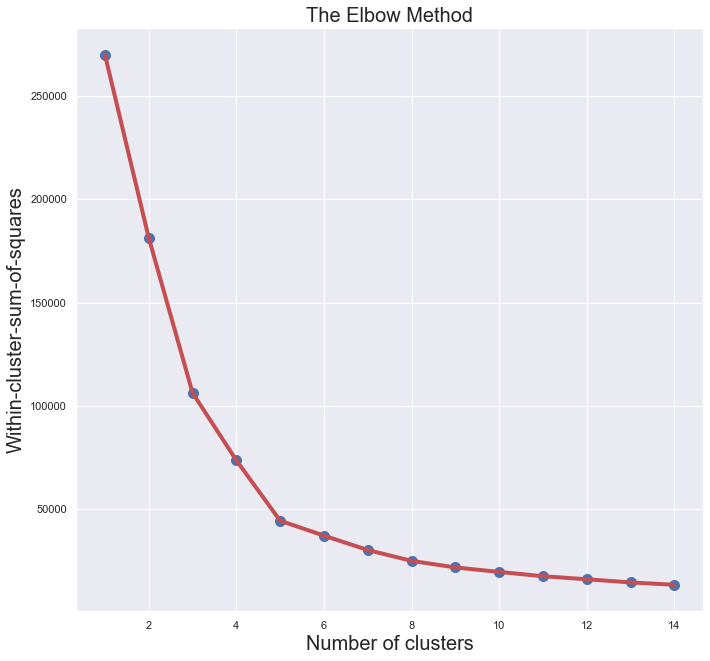

In [311]:
# Use of the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,10))
plt.scatter(range(1, 15),wcss,c='b',s=100)
plt.plot(range(1, 15),wcss,c='r',linewidth=4)
plt.title('The Elbow Method',fontsize=20)
plt.xlabel('Number of clusters',fontsize=20)
plt.ylabel('Within-cluster-sum-of-squares',fontsize=20)
plt.show()

### The optimal value of K is 5 in this case

In [312]:
# Train the K-Means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
fit = kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

In [313]:
y_kmeans

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 4, 2, 0, 2, 4, 2, 4, 2,
       0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 0, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

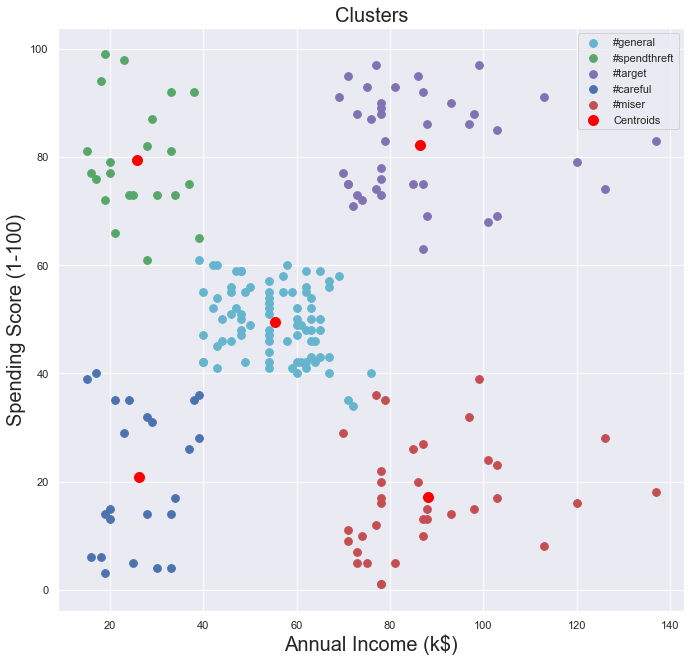

In [314]:
# Visualization of the clusters of customers
plt.figure(figsize=(10,10))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 60, c = 'c', label = '#general')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 60, c = 'g', label = '#spendthreft')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 60, c = 'm', label = '#target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 60, c = 'b', label = '#careful')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 60, c = 'r', label = '#miser')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'red', label = 'Centroids')
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.show()

In [315]:
score = silhouette_score (X,fit.labels_ )
print("Score = ", score)

Score =  0.553931997444648


### This scores 0.553931997444648 stands the highest for features Annual Income and Spending Score for K means Clustering

### So, once done with selecting the optimal value of K as 5 now we have 5 patterns or clusters with us. By analysing the clusters we do can make some conclusions and decide on which customer segment to focus and target upon.

### On the basis of the same the clusters are divided as follows -

Customers having annual income in the range of 10 to 40(k$ and having spending score from 10 to 40 are categorized as CAREFUL/ JUDICIOUS customer group. That is they are spending carefully as per their own capacity.

Customers having annual income in rthe range of 10 to 40(k$) and having spending score from 60 to 100 are categorized as SPENDTHREFT customer group. That is despite having low income they are spending much and have high spending scores

Customers having annual income in the range of 40 to 70(k$) and having spending score from 40 to 60 is categorized as GENERAL customer group. ie. It is general mass of people having average income and they spending accordingly

Customers having annual income in the range of 70 to 120(k$) and having spending score from 5 to 40 are categorized into MISER customer segment group. ie. Though having higher annual income the spending score is too less.

Now, Customers having annual income in the range of 70 to 120(k$) and as well as having spending score from 65 to 100 are categorized into TARGET customer segment. This is the clusters or group we need to target for increased Productivity and sales.

# Hierarchical Clustering

### Applying for transformed model

In [316]:
cluster_h = AgglomerativeClustering(n_clusters = 5)
model_h = cluster_h.fit(features)

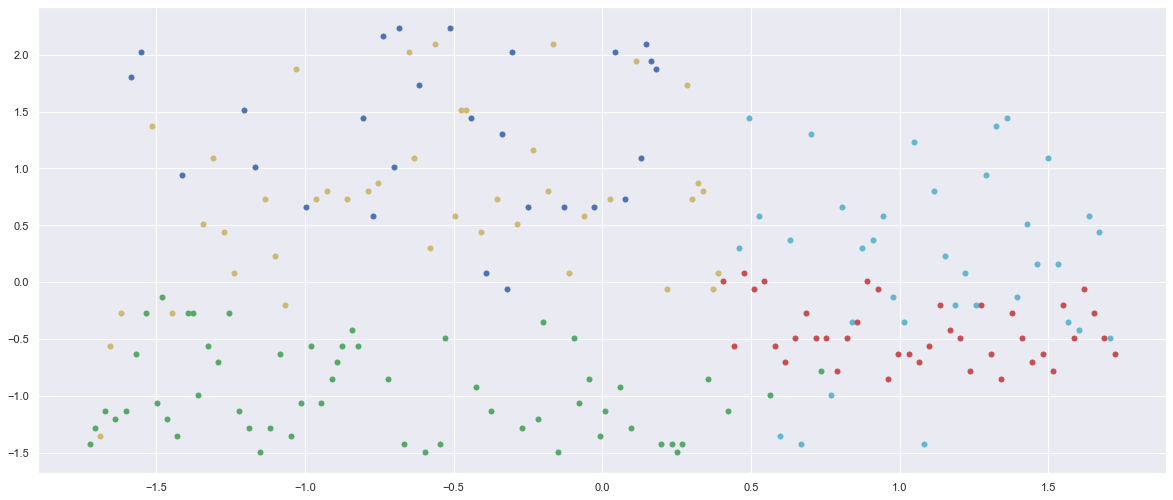

In [317]:
labels = model_h.labels_
for i in range(features.shape[0]):
    #print("coordinate:",features[i], "label:", labels[i])
    plt.plot(features[i][x_axis], features[i][y_axis], colors[labels[i]], markersize = 10)
plt.show()

In [318]:
score = silhouette_score (df1, model.labels_)
print("Score = ", score)

Score =  0.2114493609692701


### Let's try using Dendrogram for finding the number of n_clusters

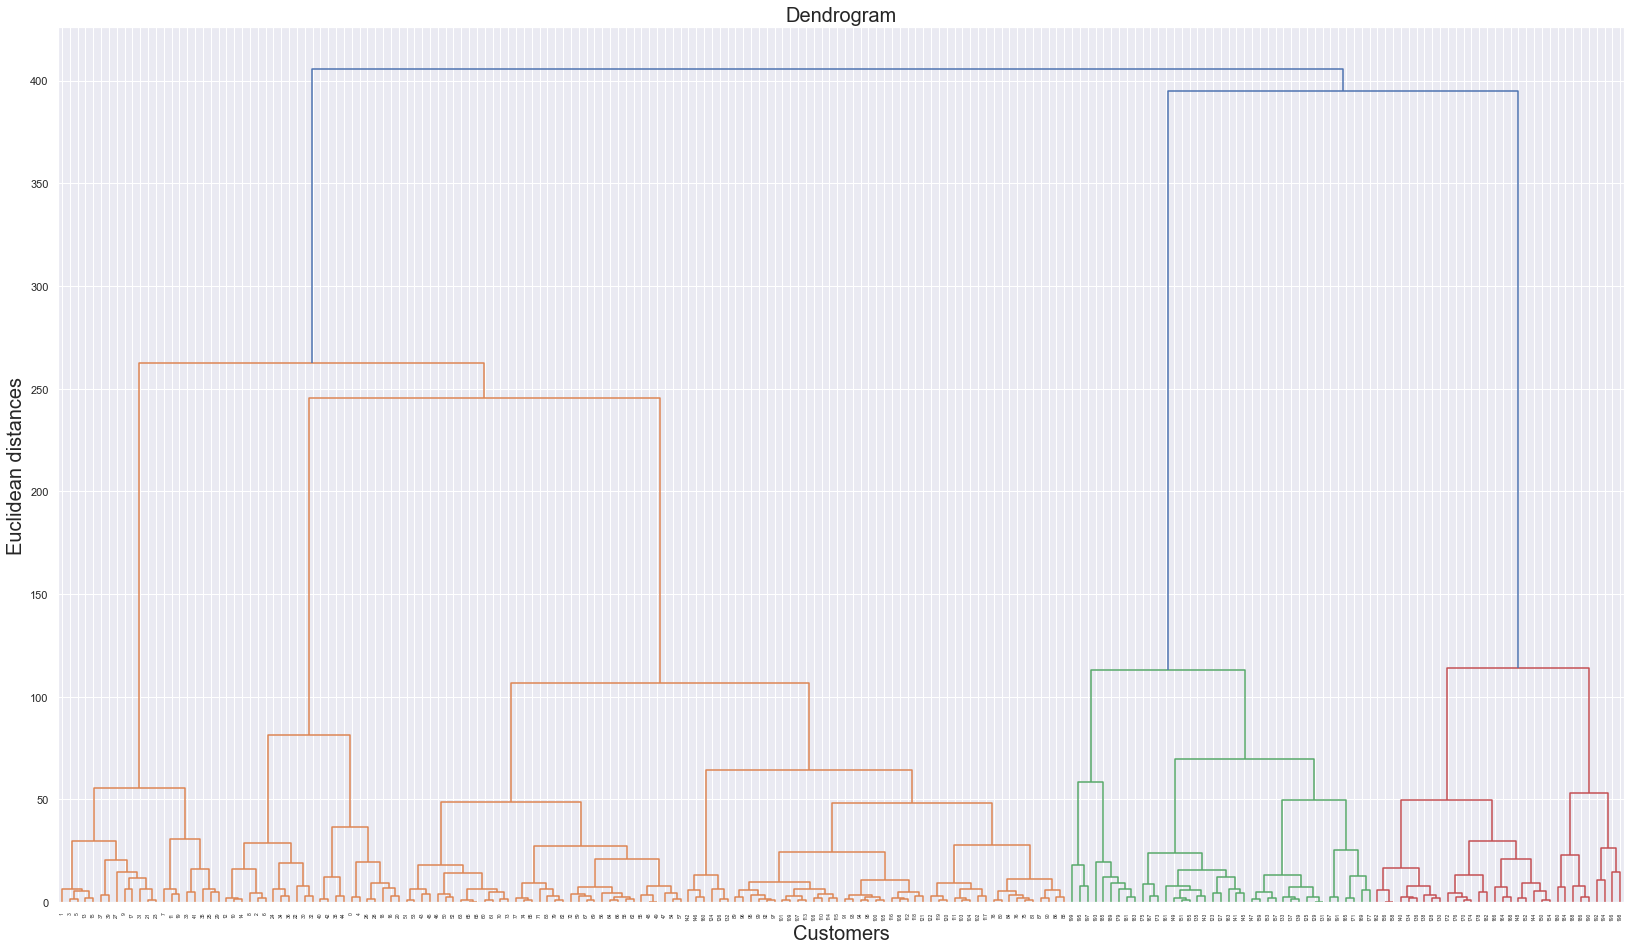

In [319]:
import scipy.cluster.hierarchy as sch

# Use the dendrogram to find the optimal number of clusters
plt.figure(figsize=(25,15))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram',fontsize=20)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distances',fontsize=20)
plt.show()

In [320]:
# Train the Hierarchical Clustering model on the dataset
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
fit = hc.fit(X)
y_hc = hc.fit_predict(X)

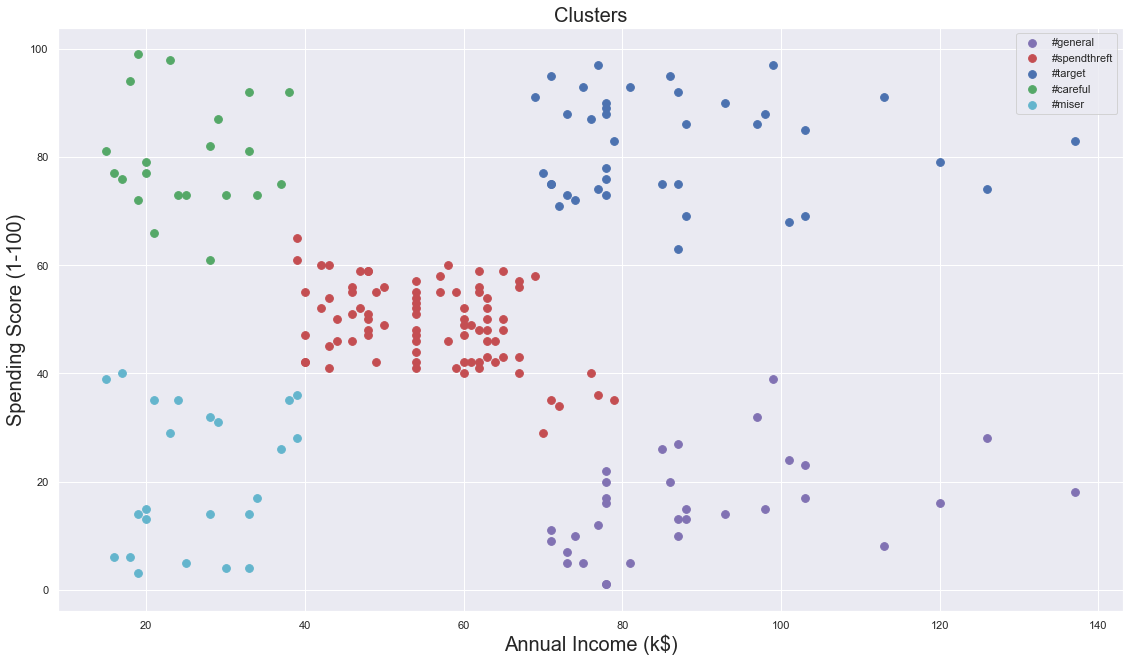

In [321]:
# Visualization of the clusters of customers
plt.figure(figsize=(17,10))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 60, c = 'm', label = '#general')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 60, c = 'r', label = '#spendthreft')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 60, c = 'b', label = '#target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 60, c = 'g', label = '#careful')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 60, c = 'c', label = '#miser')
plt.title('Clusters',fontsize=20)
plt.xlabel('Annual Income (k$)',fontsize=20)
plt.ylabel('Spending Score (1-100)',fontsize=20)
plt.legend()
plt.show()

In [322]:
score = silhouette_score (X,fit.labels_ )
print("Score = ", score)

Score =  0.5529945955148897


### This scores stands little less than the K means Clustering for features Annual Income and Spending Score

### Similarly as used in K Means clsutering the same can be done here. ie. 


Customers having annual income in the range of 10 to 40(k$ and having spending score from 10 to 40 are categorized as CAREFUL/ JUDICIOUS customer group. That is they are spending carefully as per their own capacity.

Customers having annual income in rthe range of 10 to 40(k$) and having spending score from 60 to 100 are categorized as SPENDTHREFT customer group. That is despite having low income they are spending much and have high spending scores

Customers having annual income in the range of 40 to 70(k$) and having spending score from 40 to 60 is categorized as GENERAL customer group. ie. It is general mass of people having average income and they spending accordingly

Customers having annual income in the range of 70 to 120(k$) and having spending score from 5 to 40 are categorized into MISER customer segment group. ie. Though having higher annual income the spending score is too less.

Now, Customers having annual income in the range of 70 to 120(k$) and as well as having spending score from 65 to 100 are categorized into TARGET customer segment. This is the clusters or group we need to target for increased Productivity and sales.

## DBSCAN Clustering

### Application on Transformed Data

In [323]:
# Density Based Spatial Clustering of Applications with Noise
from sklearn.cluster import DBSCAN

In [326]:
# Applying on Transformed data

### Application on untransformed data

In [327]:
def dbscan(X, eps, min_samples):
    ss = StandardScaler()
    X = ss.fit_transform(X)
    db = DBSCAN(eps=eps, min_samples=min_samples)
    db.fit(X)
    y_pred = db.fit_predict(X)
    plt.figure(figsize=(10,10))
    plt.title('Clusters',fontsize=20)
    plt.xlabel('Annual Income (k$)',fontsize=20)
    plt.ylabel('Spending Score (1-100)',fontsize=20)
    plt.legend()
    plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='coolwarm')
    plt.title("DBSCAN")

No handles with labels found to put in legend.


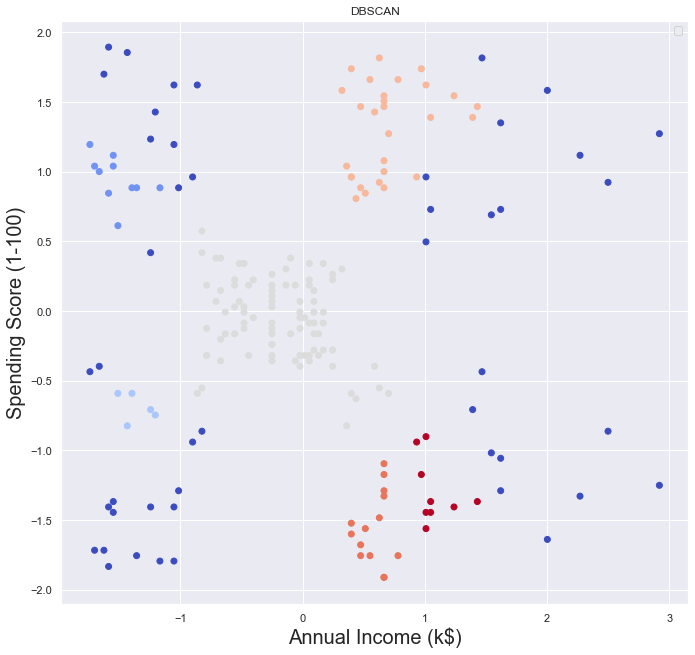

In [328]:
dbscan(X,eps=0.275,min_samples=5)

### DBSCAN Clustering (where DBSCAN is short for Density-Based Spatial Clustering of Applications with Noise) involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.
### Here for this data, hence this is not givng that good result

## Clusters of Customers Based on their Ages using K Means

In [329]:
data = pd.read_csv("Mall_Customers.csv")

In [330]:
x = data.iloc[:, [2, 4]].values
x.shape

(200, 2)

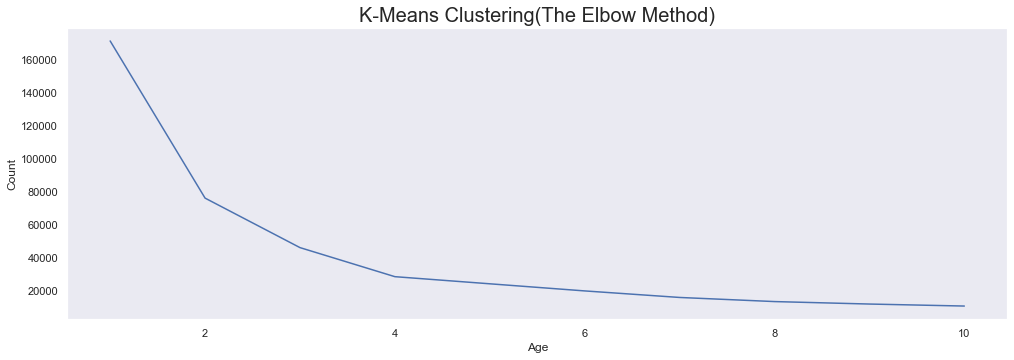

In [331]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

### The optimal K means here is 4

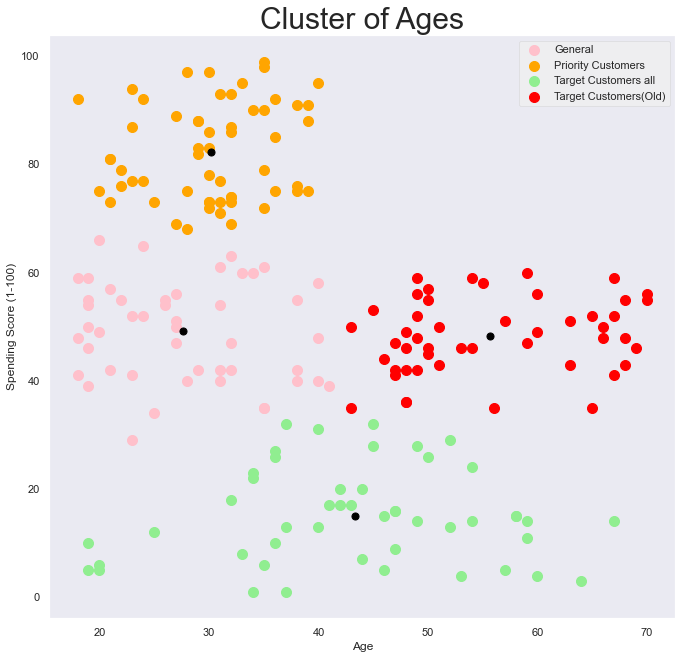

In [332]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'General' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'orange', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'lightgreen', label = 'Target Customers all')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

### For the clustering plot between the age of the customers and their corresponding spending scores, we can aggregate them into 4 different categories like we did for customers having annual income and spending scores. Here on the basis of age and their spending score we can make an analysis and draw out some conclusions. Some of the 

Here we can divide General Customers
Priority Customers, 
Senior Citizen Target Customers, 
Target Customers having low Spending Scores from all age groups.

Strategies and focus can be on Priority Customers so that they are not lost, target customers must be given the appropriate products and an efforts and approriate offers can be developed to lure the customers having low Spending Scores

### So, basically using K means we have focussed on finding Clusters of Customers Based on their Annual Income and Spending Score and clusters of segments based on their ages. We have formed clusters for each one of them and given insights on how they are divided and which customer segements to be focussed upon strategically. For finding the best model have applied K Means Clustering with and without Transformations, DBSCAN Clustering and Hierarcical Clustering as well